# Генератор сигналов

Импортируем библиотеки

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


Если русские символы на графиках отображаются некорректно, воспользуйтесь методом rc для выбора необходимого шрифта

In [3]:
#plt.rc('font',**{'family':'verdana'})

### Часть 1. Дискретизация сигнала
1. Сгенерируйте синусоиду y1 со следующими параметрами: 
    - частота опроса 30кГц; 
    - длительность сигнала 25 мс; 
    - амплитуда синусоиды 100 уровней квантования; 
    - частота синусоиды 300Гц. 
2. Сгенерируйте синусоиду y2 со следующими параметрами: 
    - частота опроса 5кГц; 
    - длительность сигнала 25 мс; 
    - амплитуда синусоиды 100 уровней квантования; 
    - частота синусоиды 300Гц. 
3. Отобразите сигналы y1 и y2 на разных графиках. 
4. Подпишите оси координат и названия графиков.
5. Обратите внимание на "плавность" обоих графиков. От чего она зависит?
6. Как правильно выбрать частоту дискретизации сигнала?

Text(0.5, 1.0, 'Sin, f=5000Hz')

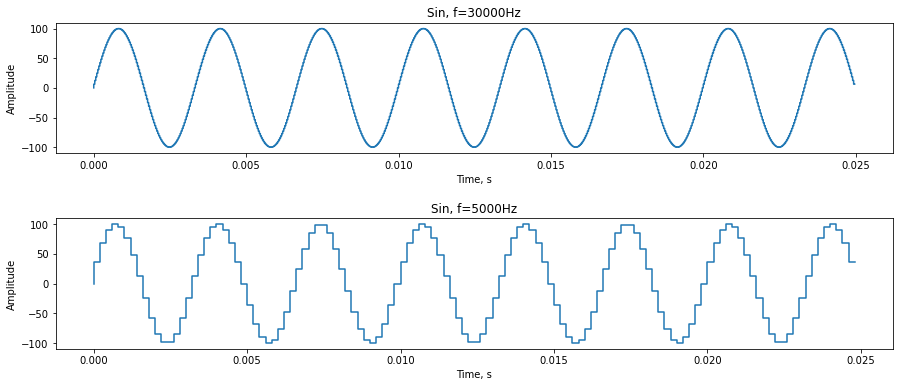

In [4]:
# Вставьте свой код и сгенерируйте необходимые сигналы
A = 100 #Амплитуда
fg = 300 #Частота синусоиды, Гц
d = 0.025 #Длительность сигнала, c

fd1 = 30000 #Частота опроса, Гц
dt1 = 1.0/fd1 #Период опроса, с
x1 = np.arange(0.0, d, dt1) #Массив меток времени
y1 = A*np.sin(2*np.pi*fg*x1) # 1 гармонический сигнал 

fd2 = 5000
dt2 = 1.0/fd2
x2 = np.arange(0.0, d, dt2)
y2 = A*np.sin(2*np.pi*fg*x2)

# Воспользуйтесь следующим кодом для отображения сигналов в виде графиков
fig, ax = plt.subplots(2,1,figsize=(15, 6))
ax[0].step(x1,y1)
ax[1].step(x2,y2)
plt.subplots_adjust(wspace=0.12, hspace=0.5)

# Вставьте свой код для вывода необходимых надписей на графиках
ax[0].set_xlabel('Time, s')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Sin, f=30000Hz')
ax[1].set_xlabel('Time, s')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Sin, f=5000Hz')

# Часть 2. Представление периодического сигнала в виде суммы гармоник
Периодическую последовательность прямоугольных импульсов можно представить в виде суммы бесконечного количества синусоидальных гармоник
$$y(t)=\sum \limits_{n=0}^{\infty} a_n\sin(2 \pi f_n t)$$
Сгенерируйте сигнал, состоящий из суммы гармоник. Параметры каждой гармоники представлены в таблице.

|Номер гармоники|Амплитуда гармоники|Частота гармоники, Гц|
|--|--------|---|
|1|3184|100|
|3|1063|300|
|5|639|500|
|7|458|700|
|9|358|900|
Частота опроса равна 10кГц, длительность сигнала 50мс.

Отобразите в виде графиков все промежуточные суммы и проследите, как меняется сигнал после добавления очередной гармоники.



Text(0.5, 0, 'Time, s')

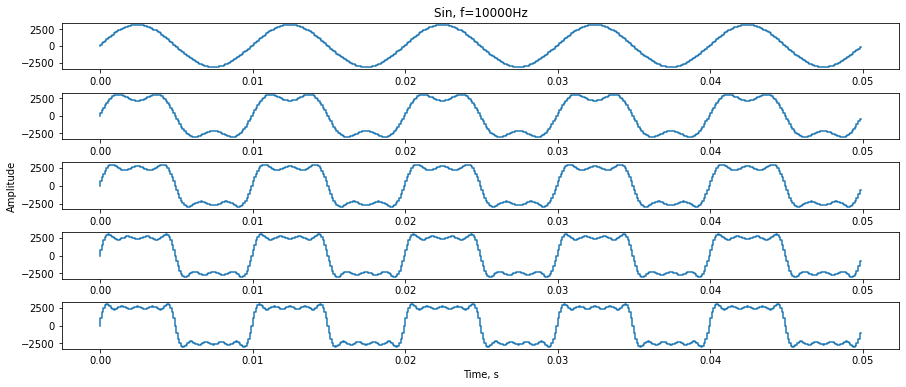

In [5]:
# Вставьте свой код
A = [3184, 1063, 639, 458, 358] #Амплитуды гармоник
fg = [100, 300, 500, 700, 900] #Частоты гармоники, Гц
d = 0.05 #Длительность сигнала
fd = 10000 #Частота опроса
dt = 1.0/fd #Период опроса
x = np.arange(0.0, d, dt) #Массив меток времени
y = 0

def imp_generator(A, fg): #Функция генерирующая синусоиды
    return A*np.sin(2*np.pi*fg*x)

fig, ax = plt.subplots(5,1,figsize=(15, 6))
plt.subplots_adjust(wspace=0.12, hspace=0.5)

for i in range(5): 
    y += imp_generator(A[i], fg[i]) #Cуммирование гармоник
    ax[i].step(x, y) #Отображение гармоник

# Вставьте свой код для вывода необходимых надписей на графиках
ax[0].set_title('Sin, f=10000Hz')
ax[2].set_ylabel('Amplitude')
ax[4].set_xlabel('Time, s')

### Часть 3. Периодическая последовательность импульсов
1. Сгенерируйте периодическую последовательность прямоугольных импульсов с параметрами:
    - частота дискретизации 10кГц;
    - длительность сигнала 100мс;
    - длительность импульса 2мс;
    - амплитуда сигнала 100 уровней квантования;
    - частота повторения импульсов 100Гц.
2. Отобразите сигнал в виде графика.
3. Измените длительность имульса или частоту повторения импульсов и отобразите полученный сигнал на новом графике.
4. На графиках должны быть соответствующие надписи.


Text(0.5, 1.0, 'Sin, f=10000Hz, fi=200Hz')

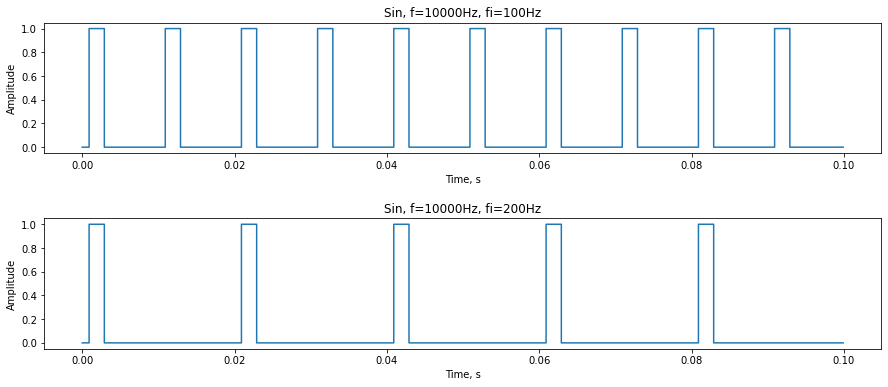

In [47]:
# Вставьте свой код
fd = 10000     
dt = 1/fd    
d = 0.1        
t = np.arange(0, d, dt)

def Signal(fg, d_imp):
    begin_imp = 10
    n_imp = int(d_imp*fd)
    signal = np.zeros(len(t))
    for i in range(int(d*fg)):
        signal[begin_imp:begin_imp +n_imp] = 1.0
        begin_imp +=fg 
    return signal

fig, ax = plt.subplots(2, 1, figsize=(15, 6))
plt.subplots_adjust(wspace=0.12, hspace=0.5)
ax[0].step(t,Signal(100, 0.002))
ax[1].step(t,Signal(200, 0.002))
ax[0].set_xlabel('Time, s')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Sin, f=10000Hz, fi=100Hz')
ax[1].set_xlabel('Time, s')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Sin, f=10000Hz, fi=200Hz')